# SVM 核方法


In [22]:
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 数据生成
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = SVC(kernel='poly',degree=2)
#model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9888888888888889

## 数据分类plot

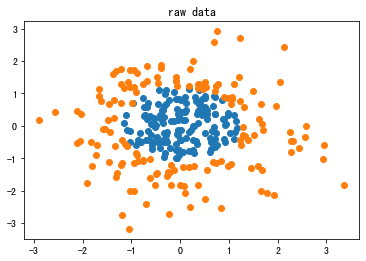

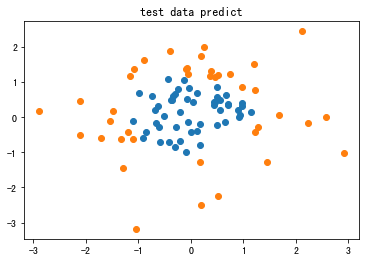

In [23]:
for clusterLabel in set(y):
    plt.scatter(X[np.where(y==clusterLabel)][:,0], X[np.where(y==clusterLabel)][:,1])
plt.title("raw data")
plt.show()

for clusterLabel in set(y_pred):
    plt.scatter(X_test[np.where(y_pred==clusterLabel)][:,0], X_test[np.where(y_pred==clusterLabel)][:,1])
plt.title("test data predict")
plt.show()

# 2维线性不可分 - 径向基核函数rbf

/var/folders/3y/xjcv8dcs1rg57mpqc7fgllj80000gn/T/ipykernel_87671/1241650851.py:25: UserWarning: No contour levels were found within the data range.
  plt.contour(X1,X2,vals,[0,1],color='b')
/var/folders/3y/xjcv8dcs1rg57mpqc7fgllj80000gn/T/ipykernel_87671/1241650851.py:25: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(X1,X2,vals,[0,1],color='b')


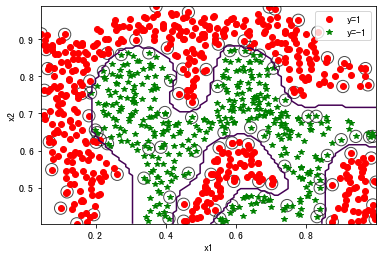

In [26]:
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
from sklearn import svm
datafile = '../resource/lawLite19/SVM/data2.mat'   


def plot_notlinearBoundary(X,y,model):
    class1 = np.where(y==1)
    class0 = np.where(y==0)
    plt.plot(X[class1,0].ravel(),X[class1,1].ravel(),'ro')
    plt.plot(X[class0,0].ravel(),X[class0,1].ravel(),'g*')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(['y=1','y=-1'])

    x1 = np.linspace(min(X[:,0]),max(X[:,0]),100).reshape(1,-1).transpose()
    x2 = np.linspace(min(X[:,1]),max(X[:,1]),100).reshape(1,-1).transpose()
    X1,X2 = np.meshgrid(x1,x2)

    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        X = np.hstack((X1[:,i].reshape(-1,1),X2[:,i].reshape(-1,1)))
        vals[:,i] = model.predict(X)
    plt.contour(X1,X2,vals,[0,1],color='b')
    sv = model.support_vectors_
    plt.scatter(sv[:,0],sv[:,1],s=150,c='none',alpha=0.7,edgecolor='black')
    plt.show()


data = spio.loadmat(datafile)
X = data['X']
y = data['y'].ravel()

svm_notlinear = svm.SVC(C=10,gamma=200,kernel='rbf').fit(X,y)
plot_notlinearBoundary(X,y,svm_notlinear)